# Example of Multiprocessing and Digit Classification

## Loading the dataset

In [1]:
print "Hello world"

Hello world


In [2]:
print "Loading dataset..."
import numpy as np
from sklearn import datasets, linear_model, cross_validation, preprocessing, svm
digits = datasets.load_digits()
X = digits.data
Y = digits.target
print "Done"

Loading dataset...
Done


In [5]:
# How many examples?
# How many digits?
X.shape

(1797, 64)

In [185]:
Y.shape

(1797,)

We can see that $X$ is a 2D matrix of *row-vectors*. Each row is an example. There are 1797 examples and there are 64 features within each example.

$Y$ is an array of *labels*. Each example has one label.

In [6]:
print Y[:100]

[0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 9 5 5 6 5 0
 9 8 9 8 4 1 7 7 3 5 1 0 0 2 2 7 8 2 0 1 2 6 3 3 7 3 3 4 6 6 6 4 9 1 5 0 9
 5 2 8 2 0 0 1 7 6 3 2 1 7 4 6 3 1 3 9 1 7 6 8 4 3 1]


In [7]:
X[0] # Taking a look at the first digit:

array([  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.,   0.,   0.,  13.,
        15.,  10.,  15.,   5.,   0.,   0.,   3.,  15.,   2.,   0.,  11.,
         8.,   0.,   0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.,   0.,
         5.,   8.,   0.,   0.,   9.,   8.,   0.,   0.,   4.,  11.,   0.,
         1.,  12.,   7.,   0.,   0.,   2.,  14.,   5.,  10.,  12.,   0.,
         0.,   0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.])

Every element of $X$ is a 1-dimensional vector, but it's really an $8\times 8$ matrix of pixel values. This is easier to see if we reshape it into the correct format:

In [8]:
X[0].reshape(8,8)

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
       [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
       [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
       [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
       [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
       [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
       [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
       [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]])

We can display this as an image with the `matshow` function.

In [72]:
matshow?

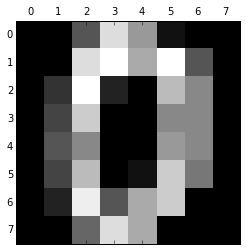

In [14]:
matshow(X[0].reshape(8,8), cmap='gray')

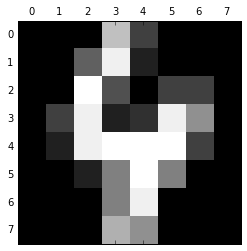

In [10]:
matshow(X[260].reshape(8,8), cmap='gray')

Label: 8


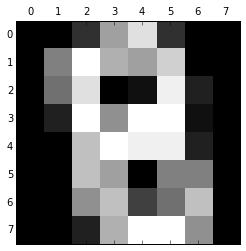

In [9]:
# You have to download and run this notebook to get the slider working.
def show_image(n):
    print "Label:", Y[n]
    matshow(X[n].reshape(8,8), cmap='gray')
    
interact(show_image, n=(0, 1000));

# Let's classify some digits.

The first step is to partition the data into training and testing sets.

In [16]:
X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(X, Y)
print X_train.shape
print X_test.shape

(1347, 64)
(450, 64)


We can create an SVM classifier and fit it to the training set. Looking at the predictions, we see that the labels don't match very closely. Here are  some predictions for the first 20 elements of the training set:

In [17]:
print "Actual labels:   ", Y_test[:20]
print "Predicted labels:", svm.SVC().fit(X_train, Y_train).predict(X_test[:20])

Actual labels:    [8 5 6 9 3 1 2 3 2 9 7 8 8 8 7 7 4 4 6 5]
Predicted labels: [8 8 8 8 3 8 8 8 2 9 7 8 8 8 8 7 4 4 8 5]


In [18]:
# Standard deviation across each column (feature):
X_train.std(0)

array([ 0.        ,  0.86815895,  4.75126531,  4.23891816,  4.27195967,
        5.61696428,  3.26729592,  1.16487859,  0.10873423,  3.18416053,
        5.41032242,  3.9935627 ,  4.75880219,  6.08274853,  3.55918047,
        0.90184282,  0.07199274,  3.61382182,  5.68372604,  5.82541879,
        6.18019957,  6.16087684,  3.3180467 ,  0.45278274,  0.03850424,
        3.1400975 ,  6.21050364,  5.88321092,  6.13422439,  5.85181614,
        3.69079165,  0.04714034,  0.        ,  3.49087106,  6.39849181,
        6.30849303,  5.92146056,  5.84080167,  3.5440259 ,  0.        ,
        0.15622338,  3.04337694,  6.52681134,  6.41646316,  6.24687853,
        5.65859787,  4.31992903,  0.27024646,  0.09029129,  1.75810829,
        5.66210511,  5.23214976,  5.32710194,  5.99323126,  4.90304417,
        0.99196761,  0.02723673,  0.87913079,  5.09994531,  4.39211746,
        4.8772816 ,  5.87162779,  4.10289132,  1.90167699])

How often do the labels match the **groundtruth** labels for the samples?

In [19]:
svm.SVC().fit(X_train, Y_train).predict(X_test) == Y_test

array([ True, False, False, False,  True, False, False, False,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
       False,  True, False, False,  True,  True, False, False, False,
        True,  True, False,  True, False, False,  True, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False,  True, False,  True,  True,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False,  True,  True,
        True,  True, False, False,  True, False, False,  True,  True,
        True,  True,  True, False,  True, False, False, False, False,
        True,  True, False,  True,  True, False,  True,  True, False,
       False,  True,  True, False, False,  True, False, False, False,
       False, False,  True,  True,  True,  True,  True, False, False,
        True, False,  True, False,  True,  True,  True, False,  True,
       False, False,

Counting the number of matches and dividing by the length gives us an accuracy score...

In [20]:
(svm.SVC().fit(X_train, Y_train).predict(X_test) == Y_test).sum() / float(len(Y_test))

0.43777777777777777

...which is exactly what the `score` function gives us.

In [21]:
svm.SVC().fit(X_train, Y_train).score(X_test, Y_test)

0.43777777777777777

One reason why this is performing badly is because SVM classifiers require their input data to be **preprocessed** by mean subtraction and standardization. You can read about that in the [SKLearn documentation about standardization](http://scikit-learn.org/stable/modules/preprocessing.html). Many kinds of classifiers benefit from this, and it's a very common practice.

Each element can be standardized indepedently:
$$x^{std}_i = \frac{x_i - \mu_i}{\sigma_i} ,$$
where $\mu_i$ and $\sigma_i$ are the mean and standard deviation of the $i$th dimension, **computed over TRAINING data only**.

If we preprocess the data in this way, we can achieve much better accuracy.

In [22]:
# Rescale the data?
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

In [24]:
svm.SVC().fit(X_train_std, Y_train).score(X_test_std, Y_test)
# Much better!

0.98888888888888893

# Again, but with cross validation!

In [26]:
def evaluate(fold):
    # Evaluate an SVM classifier
    train_indices, test_indices = fold
    X_train = X[train_indices]
    Y_train = Y[train_indices]
    X_test = X[test_indices]
    Y_test = Y[test_indices]
    scaler = preprocessing.StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    return svm.SVC().fit(X_train,Y_train).score(X_test, Y_test)
    

In [27]:
evaluate([[0,1,2], [4,5,6]])

0.0

In [29]:
train_i, test_i = cross_validation.train_test_split(range(len(X)))

evaluate([train_i, test_i])

0.97555555555555551

In [30]:
# With one fold, our function still works:
train_i, test_i = cross_validation.train_test_split(xrange(len(X)))
#evaluate([train_i, test_i])

In [31]:
for train, test in (cross_validation.KFold(len(X), n_folds=10)):
    print "Train indices:", train
    print "Test indices:", test
    print "\n\n\n"

Train indices: [ 180  181  182 ..., 1794 1795 1796]
Test indices: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179]




Train indices: [   0    1    2 ..., 1794 1795 1796]
Test indices: [180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212

In [32]:
list_of_folds = list(cross_validation.KFold(len(X), n_folds=20))
#    print evaluate( (train_i, test_i) )

In [ ]:
%%timeit
map(evaluate, list_of_folds)

In [ ]:
%%timeit
lv.map(evaluate, list_of_folds).get()

# Speeding this up with IPython Parallel

In [41]:
from IPython import parallel
rc = parallel.Client()
lv = rc.load_balanced_view()
print len(lv)

4


In [42]:
%%px
print "Hello world"

[stdout:0] Hello world
[stdout:1] Hello world
[stdout:2] Hello world
[stdout:3] Hello world


In [43]:
%%px
# Have to load the shared context on every cluster
import numpy as np
from sklearn import datasets, linear_model, cross_validation, preprocessing, svm
digits = datasets.load_digits()
X = digits.data
Y = digits.target

In [44]:
# Run on one machine:
map(evaluate, cross_validation.KFold(len(X), 10))

[0.94444444444444442,
 0.99444444444444446,
 0.97777777777777775,
 0.94444444444444442,
 0.97777777777777775,
 0.98888888888888893,
 0.97222222222222221,
 0.94413407821229045,
 0.97206703910614523,
 0.94413407821229045]

In [45]:
# Run on the cluster. The results should match:
lv.map_sync(evaluate, cross_validation.KFold(len(X), 10))

[0.94444444444444442,
 0.99444444444444446,
 0.97777777777777775,
 0.94444444444444442,
 0.97777777777777775,
 0.98888888888888893,
 0.97222222222222221,
 0.94413407821229045,
 0.97206703910614523,
 0.94413407821229045]

In [46]:
%%timeit
map(evaluate, cross_validation.KFold(len(X), 10))

1 loop, best of 3: 1.32 s per loop


In [47]:
%%timeit
lv.map_sync(evaluate, cross_validation.KFold(len(X), 10))

1 loop, best of 3: 559 ms per loop


In [48]:
print "Speedup factor:", 1320. / 559.

Speedup factor: 2.36135957066


Not awful for a 4-core machine!